In [5]:
import pandas as pd
import numpy as np
df = pd.read_csv('../csvs/lab7.csv',encoding='cp1251')
print(df.head(5))
df.info()

   id  gender  age  income  spending_rating
0   1       1   19      15               39
1   2       1   21      15               81
2   3       0   20      16                6
3   4       0   23      16               77
4   5       0   31      17               40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               198 non-null    int64
 1   gender           198 non-null    int64
 2   age              198 non-null    int64
 3   income           198 non-null    int64
 4   spending_rating  198 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [6]:
from sklearn.model_selection import train_test_split

y = df['gender'].astype(int)
X = df.drop('gender', axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.5, random_state=10)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)


(99, 4) (99, 4) (99,) (99,)


In [20]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_valid)
print('False predicts:' , (y_valid != y_pred).sum())
print('True predicts:' , (y_valid == y_pred).sum())

False predicts: 41
True predicts: 58


In [21]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
y_pred = DT.fit(X_train, y_train).predict(X_valid)
print('True:',(y_valid != y_pred).sum())
print('Not true:',(y_valid == y_pred).sum())

True: 41
Not true: 58


DecisionTreeClassifier(max_depth=4, random_state=10)


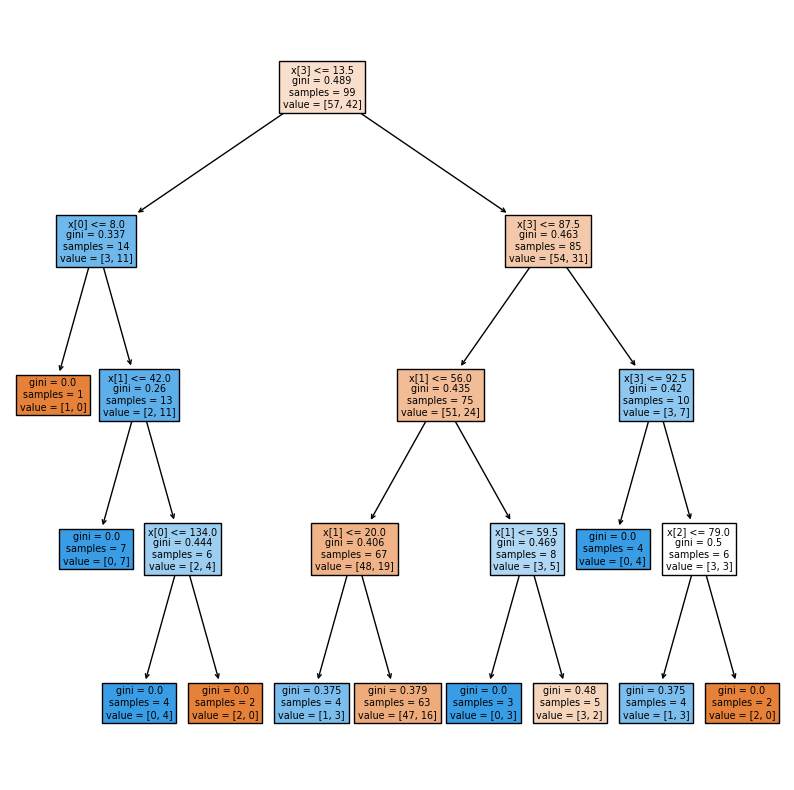

In [24]:

from sklearn import tree
from matplotlib import pyplot as plt

short_DT = DecisionTreeClassifier(max_depth=4, random_state=10)
print(short_DT.fit(X_train, y_train))
plt.subplots(1,1,figsize = (10,10))
tree.plot_tree(short_DT, filled = True)
plt.show()


## Задание

1. Загрузить пред обработанные данные, вывести первые 5 строк из 
датасета;
2. Выделить данные и метки признаков, разбейте выборку на обучающую 
и тестовую в пропорции 75/25;
3. Провести классификацию наблюдений наивным байесовским методом и 
методом деревьев;
4. Указать точность наблюдений score() и измените пропорции выборки
(85/15,75/25, 65/35, 55/45, 45/55, 35/65, 25/75, 15/85);
5. Построить график зависимости неправильно классифицированных 
результатов в зависимости от пропорции выборки.
6. Отобразите дерево максимальной глубиной 3.

In [25]:
df = pd.read_csv('../csvs/lab7.csv',encoding='cp1251')
print(df.head(5))
df.info()

   id  gender  age  income  spending_rating
0   1       1   19      15               39
1   2       1   21      15               81
2   3       0   20      16                6
3   4       0   23      16               77
4   5       0   31      17               40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               198 non-null    int64
 1   gender           198 non-null    int64
 2   age              198 non-null    int64
 3   income           198 non-null    int64
 4   spending_rating  198 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [26]:
y = df['gender'].astype(int)
X = df.drop('gender', axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75, random_state=10)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(148, 4) (50, 4) (148,) (50,)


In [27]:
gnb = GaussianNB().fit(X_train, y_train)

DT = DecisionTreeClassifier().fit(X_train, y_train)

print("GNB accurasy:", gnb.score(X_valid, y_valid))
print("DT accuracy:", DT.score(X_valid, y_valid))

GNB accurasy: 0.54
DT accuracy: 0.54


In [32]:
splits = [0.85, 0.75, 0.65, 0.55, 0.45, 0.35, 0.25, 0.15]

GNB_false_predicts = []
DT_false_predicts = []

for split in splits:
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=split, random_state=10)
    gnb = GaussianNB().fit(X_train, y_train)
    DT = DecisionTreeClassifier().fit(X_train, y_train)
    print("Split coef is: ", split)
    print("GNB accurasy:", gnb.score(X_valid, y_valid))
    y_pred = gnb.predict(X_valid)
    GNB_false_predicts.append((y_valid != y_pred).sum())
    print("Dt accuracy:", DT.score(X_valid, y_valid))
    y_pred = DT.predict(X_valid)
    DT_false_predicts.append((y_valid != y_pred).sum())
    print("\n\n")

Split coef is:  0.85
GNB accurasy: 0.5333333333333333
Dt accuracy: 0.6



Split coef is:  0.75
GNB accurasy: 0.54
Dt accuracy: 0.54



Split coef is:  0.65
GNB accurasy: 0.6
Dt accuracy: 0.5714285714285714



Split coef is:  0.55
GNB accurasy: 0.5555555555555556
Dt accuracy: 0.5888888888888889



Split coef is:  0.45
GNB accurasy: 0.5779816513761468
Dt accuracy: 0.6055045871559633



Split coef is:  0.35
GNB accurasy: 0.5658914728682171
Dt accuracy: 0.5658914728682171



Split coef is:  0.25
GNB accurasy: 0.5503355704697986
Dt accuracy: 0.5570469798657718



Split coef is:  0.15
GNB accurasy: 0.5443786982248521
Dt accuracy: 0.46745562130177515


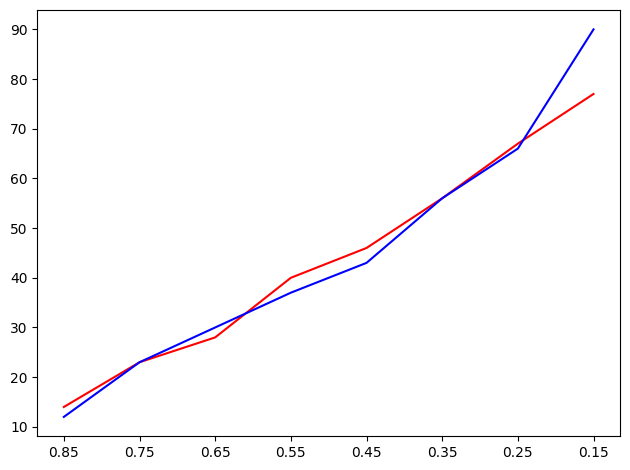

In [43]:
plt.plot(GNB_false_predicts, color='r', label='GNB mistakes')
plt.plot(DT_false_predicts, color='b', label='DT mistakes')
plt.xticks(range(len(splits)), splits)
plt.tight_layout()
plt.show()

DecisionTreeClassifier(max_depth=3, random_state=10)


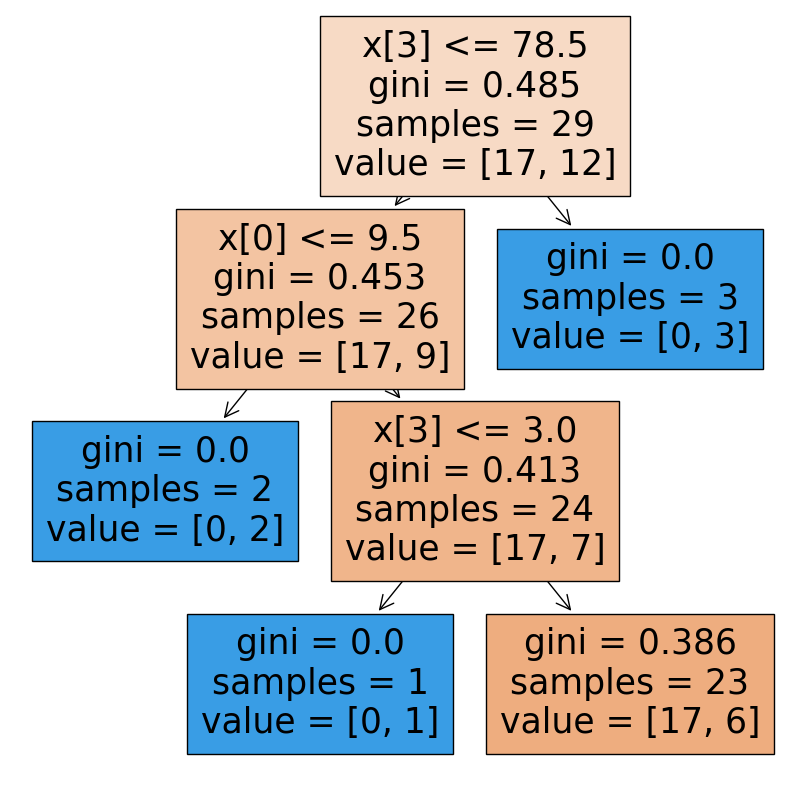

In [44]:
short_DT = DecisionTreeClassifier(max_depth=3, random_state=10)
print(short_DT.fit(X_train, y_train))
plt.subplots(1,1,figsize = (10,10))
tree.plot_tree(short_DT, filled = True)
plt.show()